In [1]:
#First import all what we need from electroPy
from electroPy import HdF5IO, AnalogSignal, TimeFreq

In [2]:
#Where is the file ? The file is in the kitchen... 
path = 'C:/Users/ludov/Documents/2018-08-10T13-54-41McsRecording.h5'

#Open the .h5 file
my_file = HdF5IO(path)

#Get the data for computation, i.e. on the first channel
ch_0 = my_file.raw_record()[0]

#We also need the the time vector
time_vector = my_file.raw_time()

#And the sampling rate
sampling_rate = my_file.raw_sampling_rate()

C:\Users\ludov\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


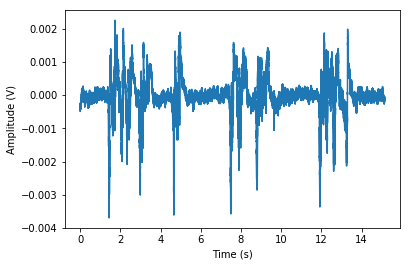

In [6]:
#Let's plot the data just for fun 
from matplotlib import pyplot as plt

fig1 =plt.figure()
plt.plot(time_vector,ch_0)
plt.xlabel('Time (s)'); plt.ylabel('Amplitude (V)')
plt.show()

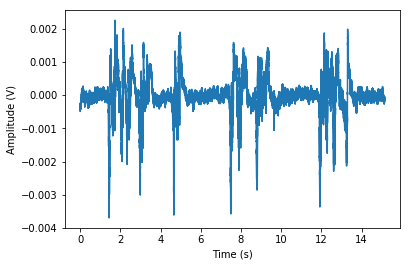

In [7]:
#Now we need to convert our .h5 data in AnalogSignal
#'Cause the morlet/fft/scalo method can only hanlde this kind of object
#The minimum to fill are the signal, the time vector and the sampling rate

anasig = AnalogSignal(signal=ch_0,time_vector=time_vector,
                      sampling_rate=sampling_rate)

#Let's plot it to see, it should look exactly like above
fig2 = plt.figure()
plt.plot(anasig.t(),anasig.signal)
plt.xlabel('Time (s)'); plt.ylabel('Amplitude (V)')
plt.show()

In [8]:
#Now we can go the the scalogram 
#Here u should fill the following parameters, f_start & f_stop delimit the freq range for computation 
#Deltafreq has a binning effect, a high delta implies low spectral resolution but faster computation...
scalo = TimeFreq(anasig,
                 f_start=5,
                 f_stop=20,
                 deltafreq=2,
                 sampling_rate=sampling_rate)

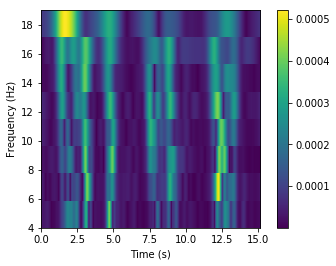

In [12]:
#Then we should plot it ! 
from matplotlib import pyplot as plt

fig3, ax = plt.subplots(1,1)

scalo.plotMap(ax)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
plt.show()

#Tadaaaaaaaaaaaaaaaaaaaaaaaaaaaaa